# Demo of End-to-End Imaging Loop


[Colab Link](https://colab.research.google.com/github/casangi/astroviper/blob/main/docs/core_tutorials/imaging/demo_imaging_loop.ipynb)


This notebook demonstrates the AstroViper imaging loop, which implements a tclean-like workflow with:
- Major/minor cycle iteration control
- Visibility-domain residual calculation
- Hogbom deconvolution
- Convergence visualization

## Install Astroviper and Xradio (needed for colab)

In [1]:
from importlib.metadata import version
import os

try:
    os.system('pip install "xradio[casacore]"')
    os.system('pip install --upgrade astroviper')

    import astroviper
    print("Using astroviper version", version("astroviper"))

except ImportError as exc:
    print(f"Could not import astroviper: {exc}")

Using astroviper version 0.0.34


## Setup

First, we import the required modules and generate synthetic visibility data with point sources.

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
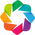

/Users/akepley/opt/anaconda3/envs/astroviper/lib/python3.13/site-packages/requests/__init__.py:86: RequestsDependencyWarning: Unable to find acceptable character detection dependency (chardet or charset_normalizer).
  warnings.warn(


In [2]:
import numpy as np
import xarray as xr
import holoviews as hv
hv.extension('bokeh')

# AstroViper imports
from astroviper.core.imaging.imaging_utils.standard_gridding_example import generate_ms4_with_point_sources
from astroviper.core.imaging.imaging_utils.iteration_control import (
    IterationController,
    ReturnDict,
    plot_convergence_history,
    ConvergencePlots,
)
from astroviper.core.imaging.imager import run_imaging_loop

## Generate Synthetic MSv4 with Point Sources

We use `generate_ms4_with_point_sources` to create a measurement set with 4 point sources.
This function:
1. Downloads Antennae field UV coverage (if not cached)
2. Creates simulated point sources at random positions
3. Returns the MS4 DataTree along with image parameters

In [3]:
# Generate 4 point sources with 1 Jy each
nsources = 4
source_fluxes = np.ones(nsources)  # 1 Jy each

sources, npix, cell, ms4 = generate_ms4_with_point_sources(nsources, source_fluxes)
# Reset weights and flags, since we have put in a simulated source
ms4["WEIGHT"] = xr.ones_like(ms4["WEIGHT"])
ms4["FLAG"] = xr.zeros_like(ms4["FLAG"])

print(f"Generated MS4 with {nsources} point sources")
print(f"Image size: {npix} x {npix} pixels")
print(f"Cell size: {cell}")
print(f"\nMS4 dimensions: {dict(ms4.dims)}")
print(f"Polarizations: {list(ms4.coords['polarization'].values)}")

[2026-02-25 15:24:04,204]     INFO    viperlog:  Module path: /Users/akepley/opt/anaconda3/envs/astroviper/lib/python3.13/site-packages/toolviper 
[2026-02-25 15:24:04,229]     INFO    viperlog:  Downloading from [cloudflare] .... 


 Download List                    
 ───────────────────────────────── 
  Antennae_fld1_casa_lsrk.ps.zarr

Output()

Generated MS4 with 4 point sources
Image size: 200 x 200 pixels
Cell size: 0.42349338196723074 arcsec

MS4 dimensions: {'time': 70, 'baseline_id': 86, 'frequency': 1, 'polarization': 2, 'uvw_label': 3}
Polarizations: [np.str_('XX'), np.str_('YY')]


## Polarization Handling

The Antennae dataset has 2 polarizations (XX, YY). The imaging loop natively supports 2-pol data:
- 2-pol linear (XX, YY) → Stokes I, Q
- 2-pol circular (RR, LL) → Stokes I, V

For unpolarized point sources, Stokes Q will be zero (XX ≈ YY).

In [4]:
# For 2-pol linear (XX, YY), it produces Stokes I and Q

print(f"MS4 polarizations: {list(ms4.coords['polarization'].values)}")
print(f"VISIBILITY shape: {ms4['VISIBILITY'].shape}")
print(f"  -> Will produce Stokes ['I', 'Q'] (2-pol linear)")

MS4 polarizations: [np.str_('XX'), np.str_('YY')]
VISIBILITY shape: (70, 86, 1, 2)
  -> Will produce Stokes ['I', 'Q'] (2-pol linear)


In [5]:
# Show source positions
print("Simulated source positions and fluxes:")
for k in range(len(sources[0])):
    print(f"  Source {k+1}: pixel ({sources[0][k]}, {sources[1][k]}), flux = {sources[2][k]:.2f} Jy")

Simulated source positions and fluxes:
  Source 1: pixel (91, 112), flux = 1.00 Jy
  Source 2: pixel (122, 102), flux = 1.00 Jy
  Source 3: pixel (103, 94), flux = 1.00 Jy
  Source 4: pixel (77, 116), flux = 1.00 Jy


## Configure the Imaging Loop

Now we set up the imaging parameters.

Key parameters:
- `cell_size`: Pixel size in radians (from the MS4 generation)
- `image_size`: Image dimensions in pixels
- `nmajor`: Maximum number of major cycles (set to 3 for this demo)
- `niter`: Maximum total CLEAN iterations
- `threshold`: Stopping threshold in Jy

In [ ]:
# Convert cell size to radians
cell_rad = cell.to('rad').value

# Configure imaging parameters
params = {
    # Image geometry - use the npix from generated data
    "image_size": (200, 200),
    "cell_size": (cell_rad, cell_rad), 
    
    # Gridding
    "support": 7,
    "oversampling": 100,
    
    # Deconvolution
    "algorithm": "hogbom",
    "gain": 0.1,
    "niter": 10000,           # Max total iterations
    "threshold": 0.01,      # Stop at 10 mJy
    
    # Major cycle control - CAPPED AT 3 FOR THIS DEMO
    "nmajor": 3,
    "cyclefactor": 1.5,
    "minpsffraction": 0.05,
    "maxpsffraction": 0.8,
    
    # Spectral/polarization mode
    "chan_mode": "cube",
    "corr_type": "linear",  # XX, YY -> Stokes I, Q
}

print("Imaging parameters configured:")
print(f"  Image: {params['image_size'][0]} x {params['image_size'][1]} pixels")
print(f"  Cell size: {abs(params['cell_size'][0]) * 206265:.2f} arcsec")
print(f"  Max major cycles: {params['nmajor']}")
print(f"  Max iterations: {params['niter']}")
print(f"  Threshold: {params['threshold']*1000:.1f} mJy")

## Run the Imaging Loop

Now we execute the imaging loop. This will:
1. Create the PSF (Stokes I only)
2. For each major cycle:
   - Grid visibilities to make dirty image
   - Convert to Stokes basis (I, Q for 2-pol linear)
   - Run Hogbom deconvolution (minor cycles)
   - Degrid model to predict model visibilities
   - Compute residual visibilities
3. Track convergence throughout

In [ ]:
# Run the imaging loop
model, residual, return_dict, controller = run_imaging_loop(
    ms4=ms4,
    params=params,
    initial_model=None,
    output_dir=".",
)

## Examine Results

Let's look at the final model and residual images.

In [ ]:
print(f"Model shape: {model.shape}  # (chan, stokes, y, x)")
print(f"Residual shape: {residual.shape}")
print()
print(f"Controller state:")
print(f"  Major cycles completed: {controller.major_done}")
print(f"  Total iterations: {controller.total_iter_done}")
print(f"  Stop code: {controller.stopcode}")
print(f"  Stop reason: {controller.stopdescription}")

In [ ]:
# Plot the Stokes I model and residual
model_I = model[0, 0, :, :].real
residual_I = residual[0, 0, :, :].real
restored = model_I + residual_I

img_model = hv.Image(model_I).opts(
    tools=['hover'], title=f'Model (Stokes I) — flux: {np.sum(model_I):.3f} Jy',
    width=400, height=400, colorbar=True, cmap='viridis'
)
img_resid = hv.Image(residual_I).opts(
    tools=['hover'], title=f'Residual (Stokes I) — peak: {np.max(np.abs(residual_I)):.4f} Jy',
    width=400, height=400, colorbar=True, cmap='viridis'
)
img_restored = hv.Image(restored).opts(
    tools=['hover'], title='Restored (Model + Residual)',
    width=400, height=400, colorbar=True, cmap='viridis'
)

hv.Layout([img_model, img_resid, img_restored]).cols(3)

In [ ]:
# Compare recovered sources with input
print("Source comparison:")
print("="*60)
print(f"{'Input Position':<20} {'Input Flux':<15} {'Model Value':<15}")
print("-"*60)

for k in range(len(sources[0])):
    y, x = int(sources[0][k]), int(sources[1][k])
    input_flux = sources[2][k]
    model_value = model_I[y, x]
    print(f"({y:3d}, {x:3d})          {input_flux:10.3f} Jy    {model_value:10.3f} Jy")

## Convergence Visualization

The `IterationController` tracks convergence history in the `ReturnDict`. We can visualize this using `plot_convergence_history` or `ConvergencePlots`.

The convergence plot shows:
- **Peak Residual** (blue, left y-axis): How the peak residual decreases over iterations
- **Model Flux** (red, right y-axis): How the total model flux increases as sources are cleaned

In [ ]:
# Print ReturnDict contents to see what was tracked
print("ReturnDict contents:")
print(f"  Number of entries: {len(return_dict.data)}")
print(f"  Keys: {list(return_dict.data.keys())}")

# Show first entry details
if return_dict.data:
    first_key = list(return_dict.data.keys())[0]
    print(f"\nFirst entry (key={first_key}):")
    for field, value in return_dict.data[first_key].items():
        if isinstance(value, list) and len(value) > 3:
            print(f"  {field}: [{value[0]}, {value[1]}, ..., {value[-1]}] ({len(value)} values)")
        else:
            print(f"  {field}: {value}")

In [ ]:
# Interactive convergence plot using HoloViews
# This creates a dual y-axis plot with selectors for Stokes parameter and channel
convergence_plot = plot_convergence_history(
    return_dict,
    time=0,
    stokes='I',
    chan=0,
    width=800,
    height=400,
)

convergence_plot

In [ ]:
# Alternative: Use ConvergencePlots class for more control
plotter = ConvergencePlots(return_dict)
plotter.plot_history(time=0, stokes='I', chan=0)

## Summary

This notebook demonstrated:

1. **Synthetic data generation** using `generate_ms4_with_point_sources`
2. **Native 2-pol support** - no need to expand XX,YY to 4-pol; produces Stokes I,Q directly
3. **Imaging loop execution** with `run_imaging_loop` from `astroviper.core.imaging.imager`
4. **Results inspection** - model, residual, and restored images
5. **Convergence visualization** using `plot_convergence_history`

The imaging loop implements a complete tclean-like workflow with:
- Visibility-domain residuals (for accuracy)
- Major/minor cycle architecture
- Adaptive cycle thresholding
- Comprehensive convergence tracking
- Native support for 2-pol and 4-pol data

In [ ]:
# Final summary
print("="*60)
print("IMAGING LOOP SUMMARY")
print("="*60)
print(f"Input: {nsources} point sources, {np.sum(source_fluxes):.1f} Jy total")
print(f"Output Stokes: I, Q (from 2-pol linear XX, YY)")
print(f"Output model flux (Stokes I): {np.sum(model[:, 0, :, :]):.3f} Jy")
print(f"Final peak residual: {np.max(np.abs(residual[:, 0, :, :])):.4f} Jy")
print(f"Major cycles: {controller.major_done}")
print(f"Total iterations: {controller.total_iter_done}")
print(f"Stop reason: {controller.stopdescription}")
print("="*60)

## Compare grid2image_spheroid_msv4 vs Manual Gridding

In [ ]:
# Imports for comparison
from astroviper.core.imaging.imaging_utils.standard_grid import (
    standard_grid_numpy_wrap_input_checked,
    grid2image_spheroid_ms4,
    create_prolate_spheroidal_kernel_1D,
)
from astroviper.core.imaging.imaging_utils.gcf_prolate_spheroidal import create_prolate_spheroidal_kernel
from astroviper.core.imaging.ifft import ifft_uv_to_lm

In [ ]:
# Parameters for both methods
support = 7
oversampling = 100
image_size = np.array([npix, npix])
cell_size_arr = np.array([-cell_rad, cell_rad])
n_pol = ms4.dims['polarization']
ms4["WEIGHT"] = xr.ones_like(ms4["WEIGHT"])
ms4["FLAG"] = xr.zeros_like(ms4["FLAG"])

dirty_combined = np.zeros([1, n_pol, npix, npix], dtype=float)
grid2image_spheroid_ms4(
    vis=ms4,
    resid_array=dirty_combined,
    pixelincr=cell_size_arr,
    support=support,
    sampling=oversampling,
    dopsf=False,
    column='VISIBILITY',
    chan_mode='continuum'
)

print("grid2image_spheroid_ms4:")
print(f"  Output shape: {dirty_combined.shape}")
print(f"  Peak: {np.max(np.abs(dirty_combined[:,0])):.6f}")

In [ ]:

cgk_1D = create_prolate_spheroidal_kernel_1D(oversampling, support)

# Extract data from ms4
vis_data = ms4.VISIBILITY.data
uvw = ms4.UVW.data
freq_chan = ms4.coords["frequency"].values

# Create weight array (all ones, matching vis shape except last dim=1)
dims = ms4.dims
weight = np.ones([dims["time"], dims["baseline_id"], dims["frequency"], 1])

# Grid the visibilities
grid = np.zeros([1, n_pol, npix, npix], dtype=np.complex128)
sumwt = np.zeros([1, n_pol], dtype=np.float64)

#weight = ms4.WEIGHT.data.copy()   # (70, 86, 1, 2) — matches vis shape
#flag = ms4.FLAG.data
#weight[flag] = 0.0
#nan_uvw = np.isnan(uvw[:, :, 0]) | np.isnan(uvw[:, :, 1])
#weight[nan_uvw] = 0.0

standard_grid_numpy_wrap_input_checked(
    vis_data=vis_data,
    grid=grid,
    sum_weight=sumwt,
    uvw=uvw,
    weight=weight,
    freq_chan=freq_chan,
    cgk_1D=cgk_1D,
    image_size=image_size,
    cell_size=cell_size_arr,
    oversampling=oversampling,
    support=support,
    complex_grid=True,
    do_psf=False,
    chan_mode='continuum'
)

print(f"  Grid shape: {grid.shape}")
print(f"  Sum weights: {sumwt}")

In [ ]:
kernel, corrTerm = create_prolate_spheroidal_kernel(oversampling, support, image_size)

dirty_manual = (
    ifft_uv_to_lm(grid, axes=[2, 3])
    / corrTerm
    * image_size[0]
    * image_size[1]
    / sumwt[:, :, np.newaxis, np.newaxis]  # broadcast sumwt to image shape
)

# Take real part (should be real for Stokes I)
dirty_manual = dirty_manual.real

print("Method 2 (manual steps):")
print(f"  Output shape: {dirty_manual.shape}")
print(f"  Peak: {np.max(np.abs(dirty_manual[:,0])):.6f}")

In [ ]:
# ============================================================
# Compare the two methods
# ============================================================
diff = dirty_combined[:,0] - dirty_manual[:,0]
max_diff = np.max(np.abs(diff))
rel_diff = max_diff / np.max(np.abs(dirty_combined))

print("="*60)
print("COMPARISON: grid2image_spheroid_ms4 vs Manual Steps")
print("="*60)
print(f"Max absolute difference: {max_diff:.2e}")
print(f"Max relative difference: {rel_diff:.2e}")
print(f"Arrays match: {np.allclose(dirty_combined, dirty_manual, rtol=1e-10, atol=1e-14)}")
print("="*60)

# Visual comparison
img_combined = hv.Image(dirty_combined[0, 0, :, :]).opts(
    tools=['hover'], title='grid2image_spheroid_ms4 (pol 0)',
    width=400, height=400, colorbar=True, cmap='viridis'
)
img_manual = hv.Image(dirty_manual[0, 0, :, :]).opts(
    tools=['hover'], title='Manual gridding (pol 0)',
    width=400, height=400, colorbar=True, cmap='viridis'
)
img_diff = hv.Image(diff[0, :, :]).opts(
    tools=['hover'], title=f'Difference — max={max_diff:.2e}',
    width=400, height=400, colorbar=True, cmap='RdBu_r'
)

hv.Layout([img_combined, img_manual, img_diff]).cols(3)